In [12]:
import os
import sys
import subprocess

# Function to run terminal commands
def run_command(command):
    process = subprocess.run(command, shell=True, check=True)
    if process.returncode != 0:
        raise Exception(f"Command failed: {command}")

# 1. Create a virtual environment if it does not already exist
if not os.path.exists("env"):
    run_command(f"{sys.executable} -m venv env")
    print("Virtual environment 'env' created.")

# 2. Manually ensure 'pip' is installed in the virtual environment
python_path = os.path.join("env", "bin", "python")
run_command(f"{python_path} -m ensurepip --upgrade")
print("'pip' has been ensured in the virtual environment.")

# 3. Use the virtual environment's Python to run pip and install packages
requirements_path = os.path.join("setup", "requirements.txt")
run_command(f"{python_path} -m pip install -r {requirements_path} -q")
print("Packages from 'setup/requirements.txt' have been installed.")

# 4. Use the virtual environment's Python to add it to the Jupyter kernel
run_command(f"{python_path} -m pip install ipykernel -q")
run_command(f"{python_path} -m ipykernel install --user --name=env --display-name 'Python (env)'")
print("Virtual environment 'env' added to Jupyter kernel.")



Looking in links: /tmp/tmpi6s5sn0e
'pip' has been ensured in the virtual environment.
Packages from 'setup/requirements.txt' have been installed.
Installed kernelspec env in /home/roger/snap/code/175/.local/share/jupyter/kernels/env
Virtual environment 'env' added to Jupyter kernel.


In [1]:
!env/bin/python -m pip show pandas


Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import tensorflow 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

2024-11-12 00:18:16.076187: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 00:18:16.076618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 00:18:16.079046: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 00:18:16.084950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731367096.094541  861917 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731367096.09

In [3]:
train_img = np.load('data/k49-train-imgs.npz')['arr_0']
train_label = np.load('data/k49-train-labels.npz')['arr_0']

test_img = np.load('data/k49-test-imgs.npz')['arr_0']
test_label = np.load('data/k49-test-labels.npz')['arr_0']

char_df = pd.read_csv('data/k49_classmap.csv', encoding = 'utf-8')

In [4]:
#set font do display japanese characters
font_path = 'NotoSansJP-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)


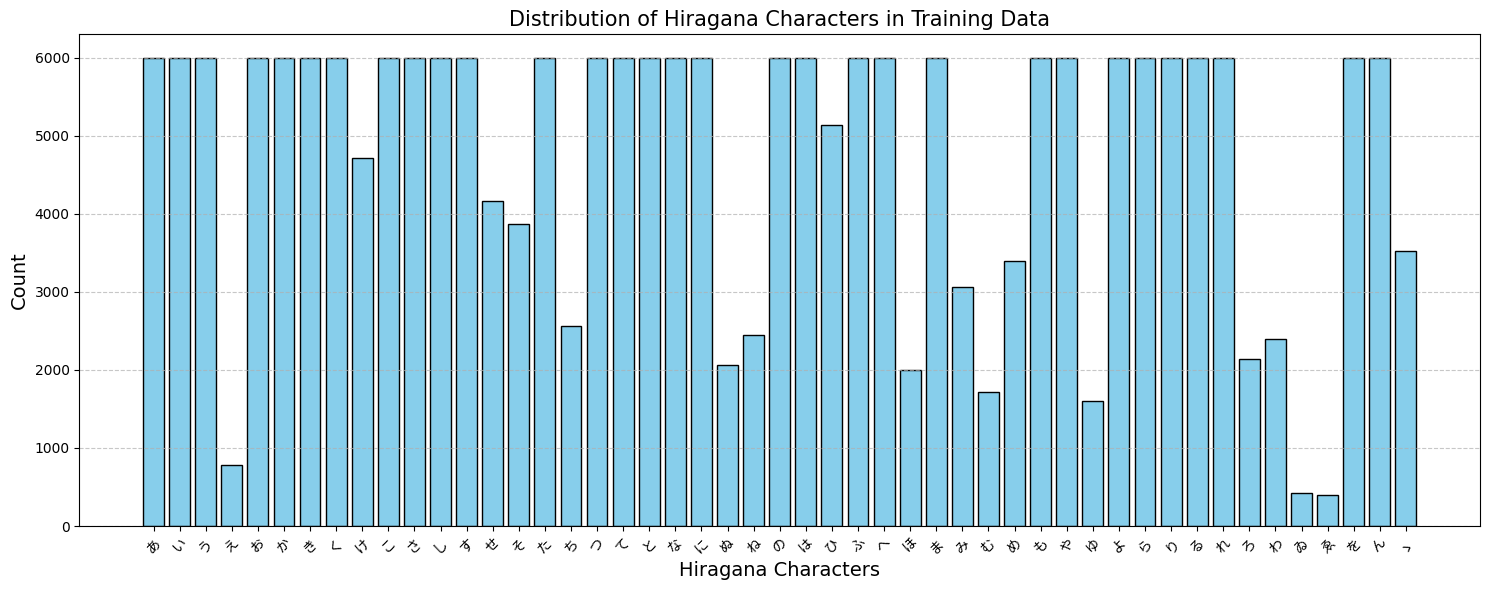

In [14]:
plt.figure(figsize=(15, 6))

# Count the frequency of each label manually
unique_labels, counts = np.unique(train_label, return_counts=True)

# Create a bar plot with the bars centered and a specified width
plt.bar(unique_labels, counts, color='skyblue', edgecolor='black', width=0.8)

# Set the x-axis labels and align them with the middle of the bars
plt.xticks(unique_labels, char_df['char'], fontsize=12, fontproperties=font_prop, rotation=45, ha='center')

# Additional plot enhancements
plt.title('Distribution of Hiragana Characters in Training Data', fontsize=15)
plt.xlabel('Hiragana Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts spacing to prevent overlap


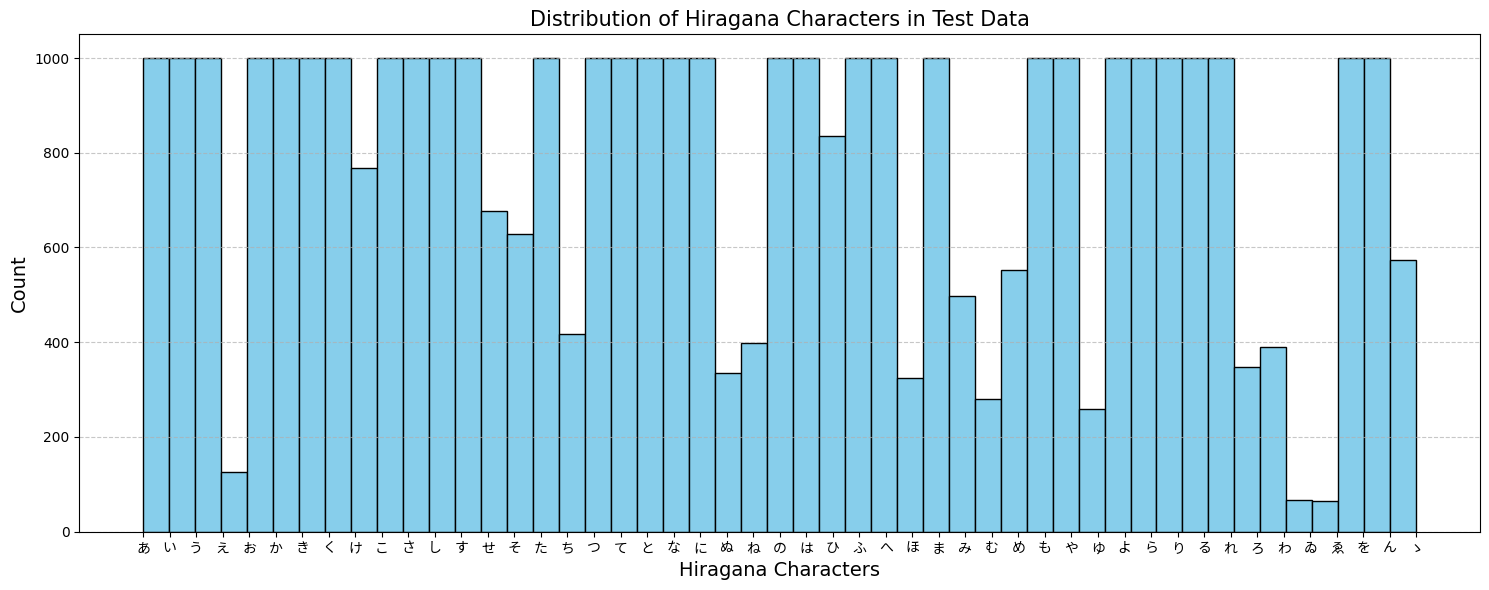

In [ ]:
plt.figure(figsize=(15, 6))

# Count the frequency of each unique label in the test data
unique_labels, counts = np.unique(test_label, return_counts=True)

# Create a bar plot with the bars centered and with a specified width
plt.bar(unique_labels, counts, color='skyblue', edgecolor='black', width=0.8)

# Set the x-axis labels and align them with the middle of the bars
plt.xticks(unique_labels, char_df['char'], fontsize=12, fontproperties=font_prop, rotation=45, ha='center')

# Additional plot enhancements
plt.title('Distribution of Hiragana Characters in Test Data', fontsize=15)
plt.xlabel('Hiragana Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts spacing to prevent overlap


In [12]:
#Normalise

train_img = train_img / 255.0
test_img = test_img / 255.0


In [13]:
img_rows, img_cols = train_img.shape[1:]

X = np.expand_dims(train_img, axis=-1)
x_test = np.expand_dims(test_img, axis=-1)
y = tensorflow.keras.utils.to_categorical(train_label)
y_test = tensorflow.keras.utils.to_categorical(test_label)


In [14]:
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(img_rows,img_cols,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2359552   
                                                      

In [20]:
model.fit(x_train,y_train,batch_size=100, epochs=3,verbose=1, validation_data=(x_val,y_val))

Epoch 1/3
1859/1859 [==============================] - 425s 228ms/step - loss: 0.8310 - accuracy: 0.7788 - val_loss: 0.2903 - val_accuracy: 0.9224
Epoch 2/3
1859/1859 [==============================] - 357s 192ms/step - loss: 0.4386 - accuracy: 0.8791 - val_loss: 0.2150 - val_accuracy: 0.9420
Epoch 3/3
1859/1859 [==============================] - 226s 122ms/step - loss: 0.3516 - accuracy: 0.9009 - val_loss: 0.1826 - val_accuracy: 0.9513


In [21]:
results = model.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", results)


386/386 [==============================] - 11s 28ms/step - loss: 0.3827 - accuracy: 0.9003
test loss, test acc: [0.38266435265541077, 0.9002516269683838]
